# EDA

In [1]:
# Import modules
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet
from sklearn.manifold import Isomap
from sklearn.metrics import accuracy_score, auc, make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RepeatedKFold, KFold
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer, RobustScaler
from sklearn.svm import SVC, NuSVC, SVR, LinearSVR
import warnings
from xgboost import XGBClassifier, XGBRegressor

# Settings
%matplotlib inline
matplotlib.style.use('ggplot')
warnings.filterwarnings('ignore')

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Read data
df = pd.read_csv('train.csv')

In [3]:
# View data
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Target: Survived

Approximately 61% of individuals survived.

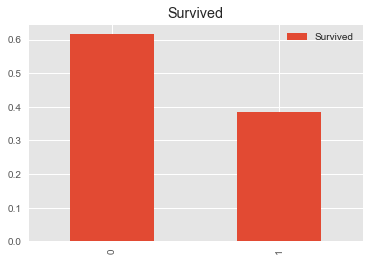

In [4]:
# Plot
pd.DataFrame(df['Survived'].value_counts()/df.shape[0]).plot.bar()
plt.title('Survived')
plt.show()

## Pclass

Most passengers were in the third class. Strangely, there were more passengers in the first class than in the second.

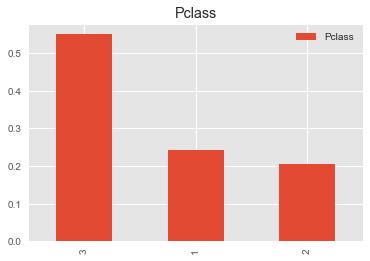

In [5]:
# Plot
pd.DataFrame(df['Pclass'].value_counts()/df.shape[0]).plot.bar()
plt.title('Pclass')
plt.show()

1st class passengers tended to have a higher survival rate. The lower class passengers perished.

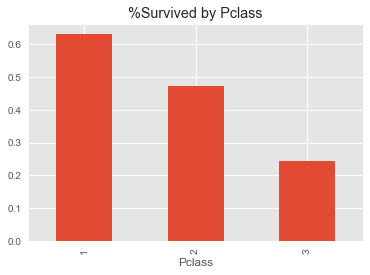

In [6]:
# Means
df.groupby('Pclass')['Survived'].mean().plot.bar()
plt.title('%Survived by Pclass')
plt.show()

Although the rates were drastically different, the counts were relatively similar: lifeboats were allocated relatively evenly between the classes, though a disproportionately high number went to the 1st class passengers.

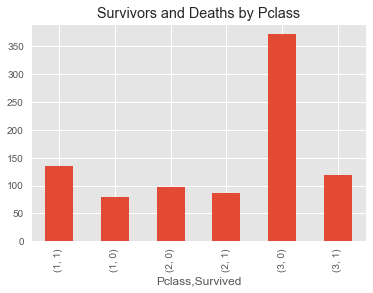

In [7]:
# Counts
df.groupby('Pclass')['Survived'].value_counts().plot.bar()
plt.title('Survivors and Deaths by Pclass')
plt.show()

### Verdict
Pclass can be encoded as an ordinal categorical feature, dummies, or a mean-encoded numeric.

In [8]:
# Initialise dictionary
var_dict = dict()

# Add transformation options
var_dict['Pclass'] = ['Ordinal', 'One-hot', 'Mean']

## Name
Names are mostly unique. First, we'll examine their title. It is worth grouping all passengers with a title other than Mr., Miss., Mrs., Master, and Dr. together. The reasons are:  
  
1. Mr., Miss., and Mrs. are common titles.
2. Master indicates privilege.
3. Doctors might have been needed to treat passengers.
  

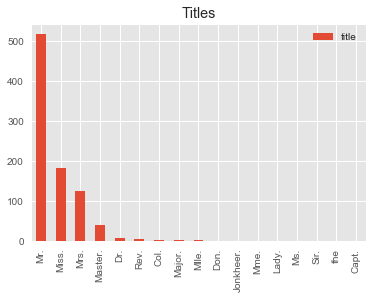

In [9]:
# Remove everything before ", "
df['title'] = df.Name.str.replace('.*, ', '').str.replace(' .*', '')

# Plot
pd.DataFrame(df.title.value_counts()).plot.bar()
plt.title('Titles')
plt.show()

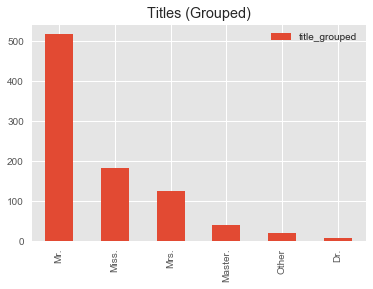

In [10]:
# Convert all other than Mr., Miss. and Mrs. to Other
df['title_grouped'] = df.title.copy()
df.title_grouped[(df.title != 'Mr.') & (df.title != 'Miss.') & (df.title != 'Mrs.') & (df.title != 'Master.') & (df.title != 'Dr.')] = 'Other'

pd.DataFrame(df.title_grouped.value_counts()).plot.bar()
plt.title('Titles (Grouped)')
plt.show()

The survival rates (below) were the highest for women and Masters, and lowest for Men. Doctors had a lower survival rate than the Others group. Hence, we will throw the doctors into the Others group.

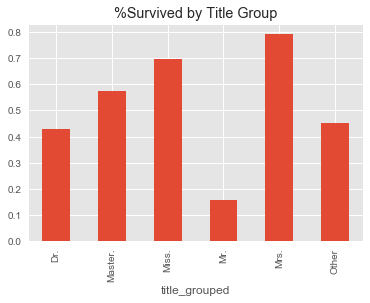

In [11]:
# Plot
df.groupby('title_grouped')['Survived'].mean().plot.bar()
plt.title('%Survived by Title Group')
plt.show()

In [12]:
# Remove everything before ", "
df['title'] = df.Name.str.replace('.*, ', '').str.replace(' .*', '')

# Convert all other than Mr., Miss. and Mrs. to Other
df['title_grouped'] = df.title.copy()
df.title_grouped[(df.title != 'Mr.') & (df.title != 'Miss.') & (df.title != 'Mrs.') & (df.title != 'Master.')] = 'Other'

# Configure order
# title_order = ['Mr.', 'Other', 'Master.', 'Miss.', 'Mrs.']

# Convert to ordinal
# df.title_grouped = df.title_grouped.astype('category', ordered = True, categories = title_order).cat.codes

### Verdict
Title can be encoded as one-hot-encoded and mean-encoded features.

In [13]:
# Add transformation options
var_dict['title'] = ['One-hot', 'Mean']

## Sex
As expected, females had a higher survival rate than men, despite there being fewer women.

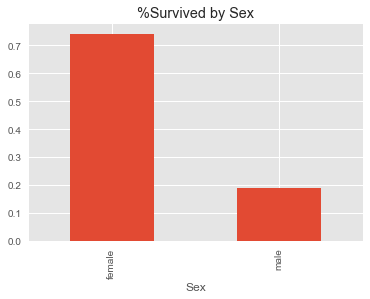

In [14]:
# Plot
df.groupby('Sex').Survived.mean().plot.bar()
plt.title('%Survived by Sex')
plt.show()

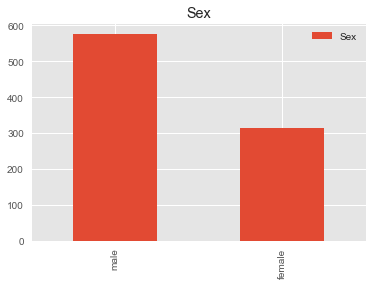

In [15]:
# Plot
pd.DataFrame(df.Sex.value_counts()).plot.bar()
plt.title('Sex')
plt.show()

### Verdict
Clearly, Sex is an important feature. It makes most sense to include this as a dummy.

In [16]:
# Add transformation options
var_dict['Sex'] = ['Dummy: Male=1', 'Dummy: Female = 1']

## Age
First, note that there are many missing values in Age: a total of 177. In the feature engineering phase, we will need to impute the means using regression methods.

In [17]:
# Missing values
print('Missing Values: ' + str(df.Age.isnull().sum()))

Missing Values: 177


In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,title_grouped
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,Mr.


### Value Imputation
Given the large number of missing values in age (about 200), value imputation might be required. A complex way to do this would be to estimate age using the other variables. We have quite a number of techniques to test out:  
  
1. Multiple scalers
2. Multiple dimensionality reduction methods
3. Multiple models  
  a. Different parameters  
  b. Cross-fold validation  
  
This may not work, depending on the RMSE of the models.

#### Model Selection
We attempt every combination above, which give us a total of 72 cross-validated models.

In general, the best linear model give us only an average error of **11 years**, which is extremely high. A passenger whose age was less than 11 would have his age over-estimated (or under-estimated) by over 100%. Thus, linear methods for imputing values are not good enough.

Do the same for ensemble models: RF and XGBoost:

Even ensemble methods are unable to give us significantly better results. The other features in the dataset are clearly unable to help us in predicting age. Thus, we will impute the median age.

First, we examine the median age of individuals with different titles. We find that passengers with the title Master were generally young men. Thus, we can use this to impute median ages for passengers with unknown ages.

In [19]:
# Check median age by title
df.groupby('title_grouped').Age.median()

title_grouped
Master.     3.5
Miss.      21.0
Mr.        30.0
Mrs.       35.0
Other      44.5
Name: Age, dtype: float64

Next, we calculate the standard deviations to add some randomness to the imputation.

In [20]:
# Calculate SD of age by title
df.groupby('title_grouped').Age.std()

title_grouped
Master.     3.619872
Miss.      12.990292
Mr.        12.708793
Mrs.       11.433628
Other      13.200233
Name: Age, dtype: float64

In [21]:
# Set seed
seed = 123

# Mask for missing ages
miss_age = df.Age.isnull()

# Masks for each title
miss_master = df.title_grouped == 'Master.'
miss_ms = df.title_grouped == 'Miss.'
miss_mr = df.title_grouped == 'Mr.'
miss_mrs = df.title_grouped == 'Mrs.'
miss_other = df.title_grouped == 'Other'

# Impute ages
np.random.seed(seed)
df['Age'][miss_age & miss_master] = np.random.normal(
    df.groupby('title_grouped').Age.median()[0],
    df.groupby('title_grouped').Age.std()[0] * 0.5,
    df['Age'][miss_age & miss_master].shape[0]
)

df['Age'][miss_age & miss_ms] = np.random.normal(
    df.groupby('title_grouped').Age.median()[1],
    df.groupby('title_grouped').Age.std()[1] * 0.5,
    df['Age'][miss_age & miss_ms].shape[0]
)

df['Age'][miss_age & miss_mr] = np.random.normal(
    df.groupby('title_grouped').Age.median()[2],
    df.groupby('title_grouped').Age.std()[2] * 0.5,
    df['Age'][miss_age & miss_mr].shape[0]
)

df['Age'][miss_age & miss_mrs] = np.random.normal(
    df.groupby('title_grouped').Age.median()[3],
    df.groupby('title_grouped').Age.std()[3] * 0.5,
    df['Age'][miss_age & miss_mrs].shape[0]
)

df['Age'][miss_age & miss_other] = np.random.normal(
    df.groupby('title_grouped').Age.median()[4],
    df.groupby('title_grouped').Age.std()[4] * 0.5,
    df['Age'][miss_age & miss_other].shape[0]
)

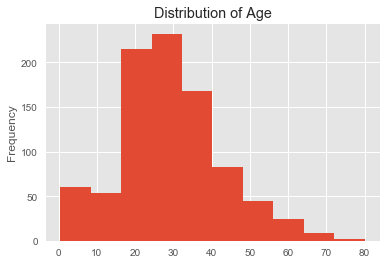

In [22]:
# Plot histogram
df.Age.plot.hist()
plt.title('Distribution of Age')
plt.show()

The distribution of ages between survivors and perishers differed slightly. Specifically, more infants survived while fewer youngsters and old people survived.

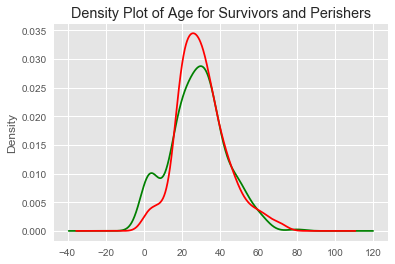

In [23]:
# Density plot of survivors and perishers
df.Age[df.Survived == 1].plot.density(c = 'green')
df.Age[df.Survived == 0].plot.density(c = 'red')
plt.title('Density Plot of Age for Survivors and Perishers')
plt.show()

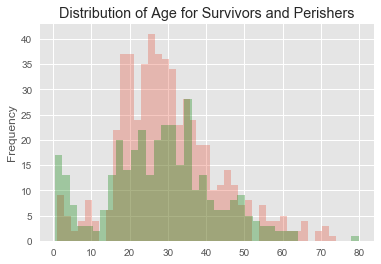

In [24]:
# Plot graphs
df.Age[df.Survived == 0].plot.hist(alpha = 0.3, bins = 40)
df.Age[df.Survived == 1].plot.hist(color = 'green', alpha = 0.3, bins = 40)
plt.title('Distribution of Age for Survivors and Perishers')
plt.show()

We can instead analyse the survival rates by quantiles. As expected, the more quantiles there are, the greater in variation there is. However, the biggest jump is from 3-5 quantiles. Beyond that, the standard deviation increases at a much slower pace. Thus, we use the first big peak (10) after 5 quantiles to break age down into categories.

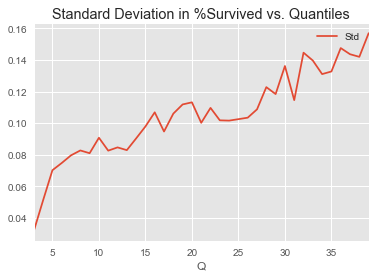

In [25]:
# Split into many quantiles
qt = np.arange(3, 40, 1)

# Initialise results
qt_results = []

for q in qt:
    
    # Copy df
    temp_df = df.copy()
    
    # Cut by quantiles
    temp_df['qt'] = pd.qcut(df.Age, q)
    age_df = temp_df[['qt', 'Survived']].groupby('qt').count()
    age_df['mean'] = temp_df.groupby('qt').Survived.mean()
    qt_results.append([q, age_df['mean'].std(), df.shape[0]/q])

# Print results
qt_results = pd.DataFrame(qt_results, columns = ['Q', 'Std', 'N'])
qt_results.plot(x = 'Q', y = 'Std')
plt.title('Standard Deviation in %Survived vs. Quantiles')
plt.show()

Passengers below 15 years in age have a significiantly higher survival rate. Above 15 years of age, we have four groups with a survival rate of approximately 30%, and five groups with a survival rate of approximately 40%. The age groups are also sufficiently wide enough (at least 3 years).

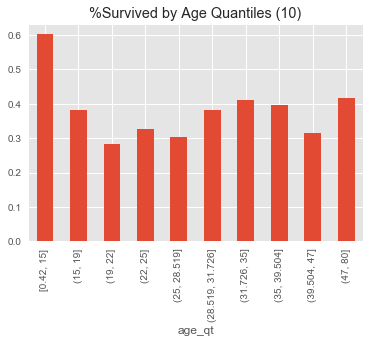

In [26]:
# Split into 10 quantiles
df['age_qt'] = pd.qcut(df.Age, 10).astype('category')

# Plot
df.groupby('age_qt').Survived.mean().plot.bar()
plt.title('%Survived by Age Quantiles (10)')
plt.show()

Grouping the quantiles further, we still maintain good variation in the survival rate across age groups.

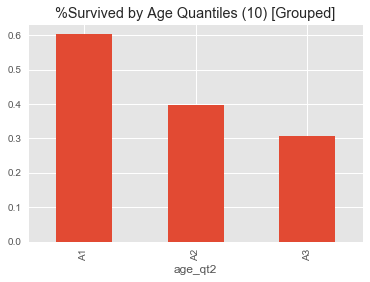

In [27]:
# Second grouping
df['age_qt2'] = 'A2'
df['age_qt2'][(df.Age > 19) & (df.Age <= 28.5)] = 'A3'
df['age_qt2'][(df.Age > 39.504) & (df.Age <= 47)] = 'A3'
df['age_qt2'][(df.Age <= 15)] = 'A1'

# Plot
df.groupby('age_qt2').Survived.mean().plot.bar()
plt.title('%Survived by Age Quantiles (10) [Grouped]')
plt.show()

### Verdict
Age should be included in many forms:  
  
1. Numeric (as is)
2. Ordinal categories
3. One-hot encoding
4. Mean-encoded numeric  
  

In [28]:
# Add transformation options
var_dict['Age'] = ['Numeric', 'Ordinal', 'One-hot', 'Mean']
var_dict

{'Age': ['Numeric', 'Ordinal', 'One-hot', 'Mean'],
 'Pclass': ['Ordinal', 'One-hot', 'Mean'],
 'Sex': ['Dummy: Male=1', 'Dummy: Female = 1'],
 'title': ['One-hot', 'Mean']}

## SibSp

We find that most passengers were travelling without siblings.

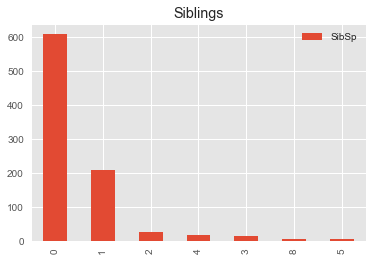

In [29]:
# Check values
pd.DataFrame(df.SibSp.value_counts()).plot.bar()
plt.title('Siblings')
plt.show()

We also find reasonable variation in the survival rates for passengers with different numbers of siblings. However, small samples may skew the data.

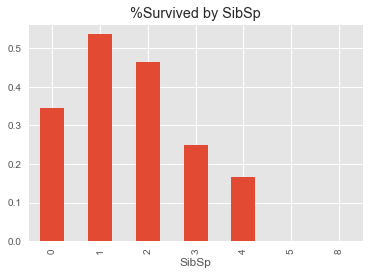

In [30]:
# Plot survival rate
df.groupby('SibSp').Survived.mean().plot.bar()
plt.title('%Survived by SibSp')
plt.show()

Hence, we group passengers into 0, 1, and 2 or more siblings. This helps to reduce the inequality in group size while bringing out variation in survival rates.

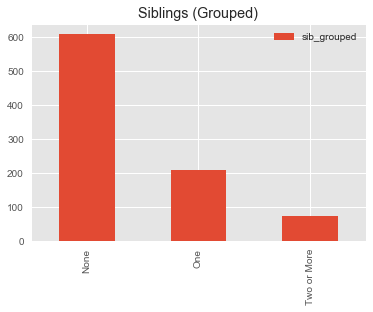

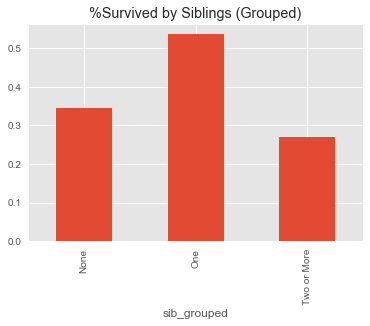

In [31]:
# Re-group
df['sib_grouped'] = 'None'
df['sib_grouped'][df['SibSp'] == 1] = 'One'
df['sib_grouped'][df['SibSp'] >= 2] = 'Two or More'

# Check values
pd.DataFrame(df.sib_grouped.value_counts()).plot.bar()
plt.title('Siblings (Grouped)')
plt.show()

# Plot survival rate
df.groupby('sib_grouped').Survived.mean().plot.bar()
plt.title('%Survived by Siblings (Grouped)')
plt.show()

### Verdict
Again, we should include siblings as numeric, ordinal, one-hot-encoded, and mean-encoded features.

In [32]:
# Add transformation options
var_dict['SibSp'] = ['Numeric', 'Ordinal', 'One-hot', 'Mean']
var_dict

{'Age': ['Numeric', 'Ordinal', 'One-hot', 'Mean'],
 'Pclass': ['Ordinal', 'One-hot', 'Mean'],
 'Sex': ['Dummy: Male=1', 'Dummy: Female = 1'],
 'SibSp': ['Numeric', 'Ordinal', 'One-hot', 'Mean'],
 'title': ['One-hot', 'Mean']}

## Parch

Running a similar analysis as we did on SibSp, we find that the inequality in group sizes is even worse.

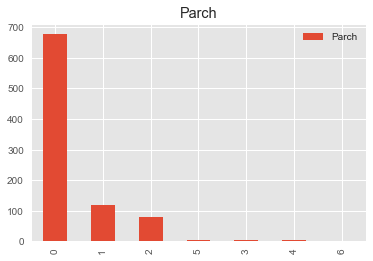

In [33]:
# Check values
pd.DataFrame(df.Parch.value_counts()).plot.bar()
plt.title('Parch')
plt.show()

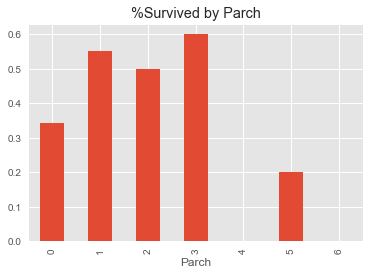

In [34]:
# Plot survival rate
df.groupby('Parch').Survived.mean().plot.bar()
plt.title('%Survived by Parch')
plt.show()

Re-grouping and re-plotting the graphs, the groups with one or two (or more) parents and children are much more balanced. These two groups also have a higher survival rate.

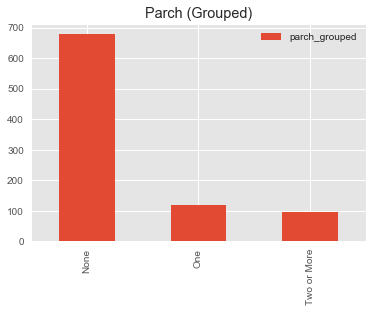

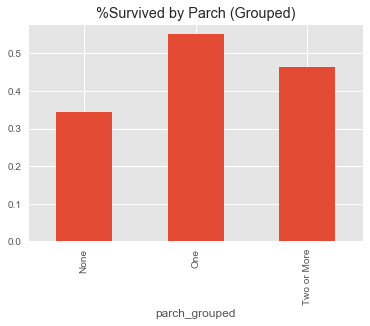

In [35]:
# Re-group
df['parch_grouped'] = 'None'
df['parch_grouped'][df['Parch'] == 1] = 'One'
df['parch_grouped'][df['Parch'] >= 2] = 'Two or More'

# Check values
pd.DataFrame(df.parch_grouped.value_counts()).plot.bar()
plt.title('Parch (Grouped)')
plt.show()

# Plot survival rate
df.groupby('parch_grouped').Survived.mean().plot.bar()
plt.title('%Survived by Parch (Grouped)')
plt.show()

### Verdict
Like SibSp, we should include siblings as numeric, ordinal, one-hot-encoded, and mean-encoded features.

In [36]:
# Add transformation options
var_dict['Parch'] = ['Numeric', 'Ordinal', 'One-hot', 'Mean']
var_dict

{'Age': ['Numeric', 'Ordinal', 'One-hot', 'Mean'],
 'Parch': ['Numeric', 'Ordinal', 'One-hot', 'Mean'],
 'Pclass': ['Ordinal', 'One-hot', 'Mean'],
 'Sex': ['Dummy: Male=1', 'Dummy: Female = 1'],
 'SibSp': ['Numeric', 'Ordinal', 'One-hot', 'Mean'],
 'title': ['One-hot', 'Mean']}

## Ticket

Looking at the string entries of Ticket, we notice that there sometimes are strings at the beginning of the entry. Some prefixes are "A/5", "PC", or generically, "[Location]/[Location]" like "SOTON", which we infer as Southampton. The common factor is that all tickets have a number.

In [37]:
df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,title_grouped,age_qt,age_qt2,sib_grouped,parch_grouped
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr.,Mr.,"(19, 22]",A3,One,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs.,Mrs.,"(35, 39.504]",A2,One,None
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,Miss.,"(25, 28.519]",A3,None,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs.,Mrs.,"(31.726, 35]",A2,One,None
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr.,Mr.,"(31.726, 35]",A2,None,None
5,6,0,3,"Moran, Mr. James",male,24.882382,0,0,330877,8.4583,NaN,Q,Mr.,Mr.,"(22, 25]",A3,None,None
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Mr.,Mr.,"(47, 80]",A2,None,None
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,Master.,Master.,"[0.42, 15]",A1,Two or More,One
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,Mrs.,Mrs.,"(25, 28.519]",A3,None,Two or More
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,Mrs.,Mrs.,"[0.42, 15]",A1,One,None


We create groups of tickets by the length of the ticket number. We consolidate the groups with ticket number length 0 (the word "Line" only), 1, 3, 7, and 8 due to the sizes of these groups.

In [38]:
# Extract number
df['tic_no'] = df.Ticket.str.replace('[a-zA-z\\.]', '')
df['tic_no'] = df.tic_no.str.replace('[\\/.* ]', '')

In [39]:
df['tic_no'].str.len().value_counts()

6    439
5    242
4    154
7     24
8     20
3      6
0      4
1      2
Name: tic_no, dtype: int64

In [40]:
# Create new feature
df['tic_len'] = 'L' + df['tic_no'].str.len().astype(str)

# Group 0, 1, 3, 7, 8
df['tic_len'][df['tic_no'].str.len().isin([0,1,3,7,8])] = 'LO'

We find that individuals with ticket L5 had a rather high survival rate. Specifically, individuals who had ticket L5 **and** were from the 1st class had a higher survival rate.

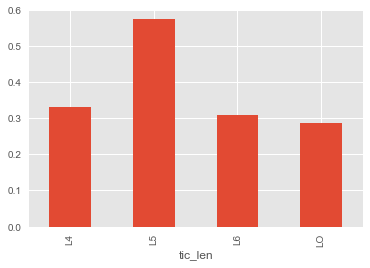

In [41]:
# Plot
df.groupby('tic_len').Survived.mean().plot.bar()

In [42]:
pd.crosstab(df.tic_len, [df.Pclass, df.Survived])

Pclass     1       2        3    
Survived   0   1   0   1    0   1
tic_len                          
L4         3   1   9  12   91  38
L5        40  98  41  30   22  11
L6        35  37  45  42  223  57
LO         2   0   2   3   36  13

### Verdict
We should include ticket length as a one-hot-encoded or mean-encoded variable.

In [43]:
# Add transformation options
var_dict['Ticket'] = ['One-hot', 'Mean']
var_dict

{'Age': ['Numeric', 'Ordinal', 'One-hot', 'Mean'],
 'Parch': ['Numeric', 'Ordinal', 'One-hot', 'Mean'],
 'Pclass': ['Ordinal', 'One-hot', 'Mean'],
 'Sex': ['Dummy: Male=1', 'Dummy: Female = 1'],
 'SibSp': ['Numeric', 'Ordinal', 'One-hot', 'Mean'],
 'Ticket': ['One-hot', 'Mean'],
 'title': ['One-hot', 'Mean']}

## Fare
Fare is a numeric variable with a massive outlier at $502 and a few values at zero.

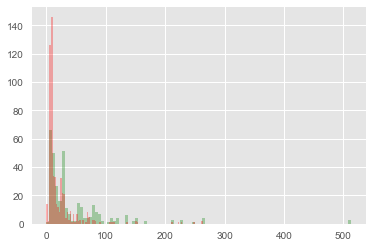

In [44]:
# Plot
plt.hist(df.Fare[df.Survived == 1], bins = 100, alpha = 0.3, color='green')
plt.hist(df.Fare[df.Survived == 0], bins = 100, alpha = 0.3, color='red')
plt.show()

Before removing outliers, we examine the correlation between Survived and Fare:

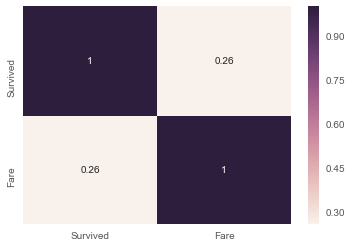

In [45]:
# Plot correlation
sns.heatmap(df[['Survived', 'Fare']].corr(), annot = True)

To remove outliers, we convert the extreme values into the next-most-extreme values.

In [46]:
# Ranked fares
fare_asc = sorted(np.unique(df.Fare))
fare_des = sorted(np.unique(df.Fare), reverse=True)

# Convert smallest and largest
df['fare_comp'] = df.Fare.copy()
df.fare_comp[df.fare_comp == df.fare_comp.min()] = fare_asc[1]
df.fare_comp[df.fare_comp == df.fare_comp.max()] = fare_des[1]

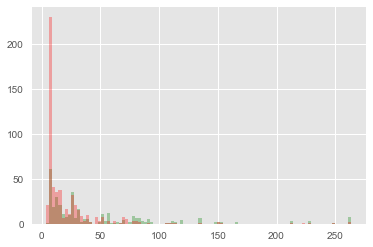

In [47]:
# Re-plot
plt.hist(df.fare_comp[df.Survived == 1], bins = 100, alpha = 0.3, color='green')
plt.hist(df.fare_comp[df.Survived == 0], bins = 100, alpha = 0.3, color='red')
plt.show()

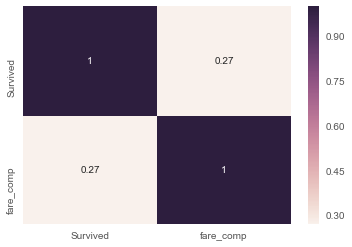

In [48]:
# Plot correlation
sns.heatmap(df[['Survived', 'fare_comp']].corr(), annot = True)

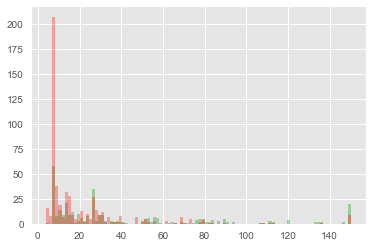

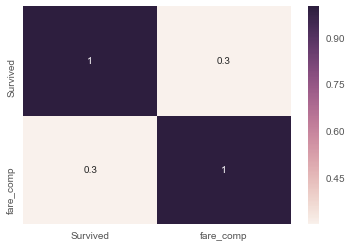

In [49]:
# Compress to 100
df.fare_comp[df.fare_comp > 150] = 150

# Re-plot
plt.hist(df.fare_comp[df.Survived == 1], bins = 100, alpha = 0.3, color='green')
plt.hist(df.fare_comp[df.Survived == 0], bins = 100, alpha = 0.3, color='red')
plt.show()

# Plot correlation
sns.heatmap(df[['Survived', 'fare_comp']].corr(), annot = True)
plt.show()

We find that the correlation improves as we compress the fares downward. Exploring the possible groups of fares,

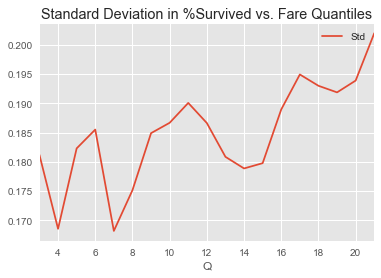

In [50]:
# Split into many quantiles
qt = np.arange(3, 22, 1)

# Initialise results
qt_results = []

for q in qt:
    
    # Copy df
    temp_df = df.copy()
    
    # Cut by quantiles
    temp_df['qt'] = pd.qcut(df.fare_comp, q)
    fare_df = temp_df[['qt', 'Survived']].groupby('qt').count()
    fare_df['mean'] = temp_df.groupby('qt').Survived.mean()
    qt_results.append([q, fare_df['mean'].std(), df.shape[0]/q])

# Print results
qt_results = pd.DataFrame(qt_results, columns = ['Q', 'Std', 'N'])
qt_results.plot(x = 'Q', y = 'Std')
plt.title('Standard Deviation in %Survived vs. Fare Quantiles')
plt.show()

From examining the splits on 6 and 11 quantiles, we find that 6 quantiles works better than 11 quantiles, because it is not as granular and can be used to divide the passengers into three groups.

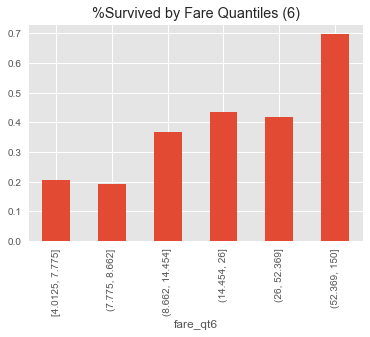

In [51]:
# Split into 6 quantiles
df['fare_qt6'] = pd.qcut(df.fare_comp, 6).astype('category')

# Plot
df.groupby('fare_qt6').Survived.mean().plot.bar()
plt.title('%Survived by Fare Quantiles (6)')
plt.show()

In [52]:
# Cross tab
pd.crosstab(df.fare_qt6, df.Survived)

Survived,0,1
fare_qt6,,
"[4.0125, 7.775]",124,32
"(7.775, 8.662]",123,29
"(8.662, 14.454]",88,51
"(14.454, 26]",84,65
"(26, 52.369]",85,61
"(52.369, 150]",45,104


Re-grouping the quantiles, we obtain good variation in survivability. G1 corresponds mostly to the 3rd class passengers and G3 to 1st class passengers, but the interesting thing is that G2 corresponds to a mix of passengers from **all three classes**. This will help to segregate the survivors from the perishers.

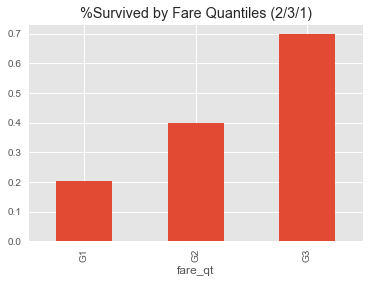

In [53]:
# Re-group quantiles
df['fare_qt'] = 'G1'
df['fare_qt'][(df['fare_comp'] > 8.662) & (df['fare_comp'] <= 52.369)] = 'G2'
df['fare_qt'][(df['fare_comp'] > 52.369)] = 'G3'

# Plot
df.groupby('fare_qt').Survived.mean().plot.bar()
plt.title('%Survived by Fare Quantiles (2/3/1)')
plt.show()

In [54]:
# Cross tab
pd.crosstab(df.fare_qt, df.Pclass)

Pclass,1,2,3
fare_qt,,,
G1,6,6,283
G2,82,171,194
G3,128,7,14


### Verdict
Thus, it is recommended that fare be included as numeric, ordinal, one-hot-encoded, and mean-encoded features.

In [55]:
# Add transformation options
var_dict['Fare'] = ['Numeric', 'Ordinal', 'One-hot', 'Mean']
var_dict

{'Age': ['Numeric', 'Ordinal', 'One-hot', 'Mean'],
 'Fare': ['Numeric', 'Ordinal', 'One-hot', 'Mean'],
 'Parch': ['Numeric', 'Ordinal', 'One-hot', 'Mean'],
 'Pclass': ['Ordinal', 'One-hot', 'Mean'],
 'Sex': ['Dummy: Male=1', 'Dummy: Female = 1'],
 'SibSp': ['Numeric', 'Ordinal', 'One-hot', 'Mean'],
 'Ticket': ['One-hot', 'Mean'],
 'title': ['One-hot', 'Mean']}

## Cabin

The most striking thing about Cabin is that there are a huge number of missing values - a total of 687.

In [56]:
# Missing values
print('Missing values: ' + str(df.Cabin.isnull().sum()))

Missing values: 687


Next, we examine the types of entries. We note that cabins typically have a letter and a number. In some cases, there are no numbers. Let's separate the cabin number into letter and number, while attaching a "NIL" entry to null entries.

### Cabin Letters

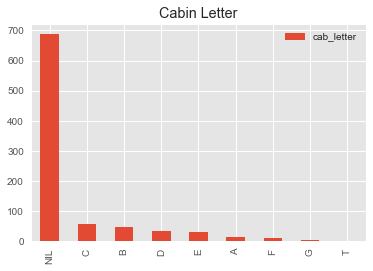

In [57]:
# Create feature for cabin letter
df['cab_letter'] = df.Cabin.str[0]
df['cab_letter'][df.Cabin.isnull()] = 'NIL'

# Plot
pd.DataFrame(df.cab_letter.value_counts()).plot.bar()
plt.title('Cabin Letter')
plt.show()

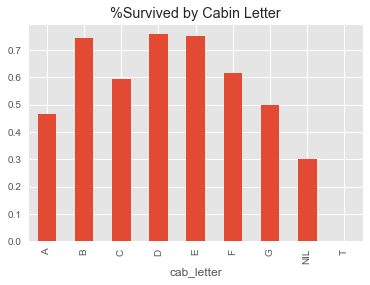

In [58]:
# Survival rate
df.groupby('cab_letter').Survived.mean().plot.bar()
plt.title('%Survived by Cabin Letter')
plt.show()

Grouping the cabins by their survival rate, (1) B/D/E and (2) Others:

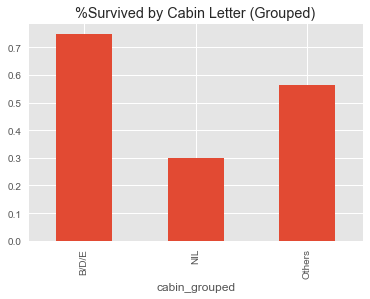

In [59]:
# Re-group cabin letters
df['cabin_grouped'] = 'B/D/E'
df['cabin_grouped'][df.cab_letter.isin(['A', 'G', 'T', 'C', 'F'])] = 'Others'
df['cabin_grouped'][df.cab_letter.isin(['NIL'])] = 'NIL'

# Survival rate
df.groupby('cabin_grouped').Survived.mean().plot.bar()
plt.title('%Survived by Cabin Letter (Grouped)')
plt.show()

In [60]:
# Relation to pclass
pd.crosstab(df.cabin_grouped, df.Pclass)

Pclass,1,2,3
cabin_grouped,,,
B/D/E,101,8,3
NIL,40,168,479
Others,75,8,9


### Cabin Numbers
Next, we extract the cabin numbers and try to identify any patterns for the **non-missing** entries.

In [61]:
temp_df = df.Cabin.str.replace('[a-zA-z]', '').str.split(' ', expand = True)
temp_df.columns = ['a','b','c','d']
temp_df.a = pd.to_numeric(temp_df.a, errors = 'coerce')
temp_df.b = pd.to_numeric(temp_df.b, errors = 'coerce')
temp_df.c = pd.to_numeric(temp_df.c, errors = 'coerce')
temp_df.d = pd.to_numeric(temp_df.d, errors = 'coerce')
df['cab_no'] = temp_df.mean(axis = 1)

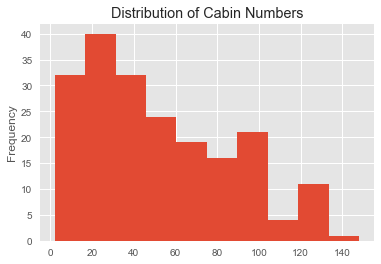

In [62]:
# Plot
df.cab_no.plot.hist()
plt.title('Distribution of Cabin Numbers')
plt.show()

It appears there there is no correlation between the cabin number and survival rate.

In [63]:
df[['cab_no', 'Survived']].corr()

,cab_no,Survived
cab_no,1.000000,-0.063858
Survived,-0.063858,1.000000


However, let's group them by quantile

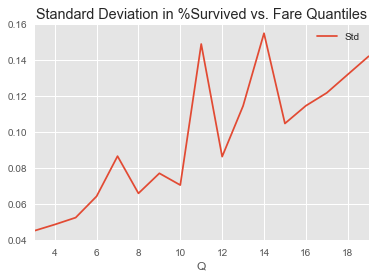

In [64]:
# Split into many quantiles
qt = np.arange(3, 20, 1)

# Check number of non-missing entries
nonmiss = df.shape[0] - df.cab_no.isnull().sum()

# Initialise results
qt_results = []

for q in qt:
    
    # Copy df
    temp_df = df.copy()
    
    # Cut by quantiles
    temp_df['qt'] = pd.qcut(df.cab_no, q)
    cabno_df = temp_df[['qt', 'Survived']].groupby('qt').count()
    cabno_df['mean'] = temp_df.groupby('qt').Survived.mean()
    qt_results.append([q, cabno_df['mean'].std(), nonmiss/q])

# Print results
qt_results = pd.DataFrame(qt_results, columns = ['Q', 'Std', 'N'])
qt_results.plot(x = 'Q', y = 'Std')
plt.title('Standard Deviation in %Survived vs. Fare Quantiles')
plt.show()

In [65]:
# Results
qt_results[qt_results.Q == 7]

,Q,Std,N
4,7,0.086458,28.571429


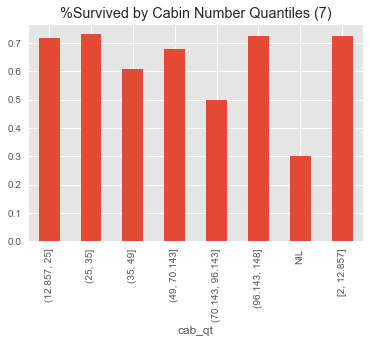

In [66]:
# Split into 7 quantiles
df['cab_qt'] = pd.qcut(df.cab_no, 7).astype('str')

# Add another quantile for NaNs
df['cab_qt'][df.cab_no.isnull()] = 'NIL'

# Convert to category
df['cab_qt'] = df.cab_qt.astype('category')

# Plot
df.groupby('cab_qt').Survived.mean().plot.bar()
plt.title('%Survived by Cabin Number Quantiles (7)')
plt.show()

We find that the grouping suffers from small samples. Thus, we re-configure the current groups based on survivability rate.

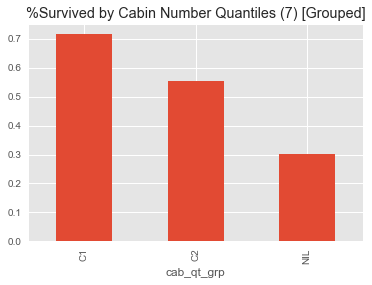

In [67]:
# Group cabin number quantiles
df['cab_qt_grp'] = 'C1'
df['cab_qt_grp'][(df.cab_no > 35) & (df.cab_no <= 49)] = 'C2'
df['cab_qt_grp'][(df.cab_no > 70.143) & (df.cab_no <= 96.143)] = 'C2'
df['cab_qt_grp'][df.cab_no.isnull()] = 'NIL'

# Plot
df.groupby('cab_qt_grp').Survived.mean().plot.bar()
plt.title('%Survived by Cabin Number Quantiles (7) [Grouped]')
plt.show()

In [68]:
pd.crosstab(df.cab_qt_grp, df.fare_qt)

fare_qt,G1,G2,G3
cab_qt_grp,,,
C1,4,64,76
C2,5,15,36
NIL,286,368,37


### Verdict
Thus, it is recommended that Cabin letters and numbers both be included as one-hot-encoded, and mean-encoded features.

In [69]:
# Add transformation options
var_dict['Cabin Letters'] = ['One-hot', 'Mean']
var_dict['Cabin Numbers'] = ['One-hot', 'Mean']
var_dict

{'Age': ['Numeric', 'Ordinal', 'One-hot', 'Mean'],
 'Cabin Letters': ['One-hot', 'Mean'],
 'Cabin Numbers': ['One-hot', 'Mean'],
 'Fare': ['Numeric', 'Ordinal', 'One-hot', 'Mean'],
 'Parch': ['Numeric', 'Ordinal', 'One-hot', 'Mean'],
 'Pclass': ['Ordinal', 'One-hot', 'Mean'],
 'Sex': ['Dummy: Male=1', 'Dummy: Female = 1'],
 'SibSp': ['Numeric', 'Ordinal', 'One-hot', 'Mean'],
 'Ticket': ['One-hot', 'Mean'],
 'title': ['One-hot', 'Mean']}

## Embarked
Finally, we examine the Embarked feature. It looks good on its own.

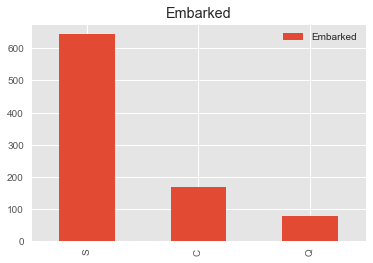

In [70]:
# Plot counts
pd.DataFrame(df.Embarked.value_counts()).plot.bar()
plt.title('Embarked')
plt.show()

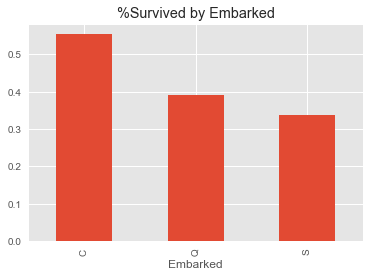

In [71]:
# Survival rates
df.groupby('Embarked').Survived.mean().plot.bar()
plt.title('%Survived by Embarked')
plt.show()

### Verdict
Thus, we should include Embarked as one-hot-encoded and mean-encoded features.

In [72]:
# Add transformation options
var_dict['Embarked'] = ['One-hot', 'Mean']
var_dict

{'Age': ['Numeric', 'Ordinal', 'One-hot', 'Mean'],
 'Cabin Letters': ['One-hot', 'Mean'],
 'Cabin Numbers': ['One-hot', 'Mean'],
 'Embarked': ['One-hot', 'Mean'],
 'Fare': ['Numeric', 'Ordinal', 'One-hot', 'Mean'],
 'Parch': ['Numeric', 'Ordinal', 'One-hot', 'Mean'],
 'Pclass': ['Ordinal', 'One-hot', 'Mean'],
 'Sex': ['Dummy: Male=1', 'Dummy: Female = 1'],
 'SibSp': ['Numeric', 'Ordinal', 'One-hot', 'Mean'],
 'Ticket': ['One-hot', 'Mean'],
 'title': ['One-hot', 'Mean']}

# Generate Features
Using the results of EDA, we generate the new features using the code segments above.

In [73]:
# Read data
df = pd.read_csv('train.csv')

# ---- PCLASS ---- #
df['pclass_OH'] = 'CLASS' + df.Pclass.astype('str')
df['pclass_OC'] = df.pclass_OH.astype('category', ordered = True, categories = ['CLASS3', 'CLASS2', 'CLASS1']).cat.codes
df['pclass_ME'] = df.pclass_OH.map(df.groupby('pclass_OH').Survived.mean())

# ---- TITLE ---- #
df['title_OH'] = df.Name.str.replace('.*, ', '').str.replace(' .*', '')
df.title_OH[(df.title_OH != 'Mr.') & (df.title_OH != 'Miss.') & (df.title_OH != 'Mrs.') & (df.title_OH != 'Master.')] = 'Other'
df['title_ME'] = df.title_OH.map(df.groupby('title_OH').Survived.mean())

# ---- SEX ---- #
df['sex_BN'] = df.Sex.astype('category').cat.codes
df['sex_OH'] = df.Sex.copy()

# ---- AGE ---- #
# Set seed
seed = 123

# Mask for missing ages
miss_age = df.Age.isnull()

# Masks for each title
miss_master = df.title_OH == 'Master.'
miss_ms = df.title_OH == 'Miss.'
miss_mr = df.title_OH == 'Mr.'
miss_mrs = df.title_OH == 'Mrs.'
miss_other = df.title_OH == 'Other'

# Impute ages
np.random.seed(seed)
df['Age'][miss_age & miss_master] = np.random.normal(
    df.groupby('title_OH').Age.median()[0],
    df.groupby('title_OH').Age.std()[0] * 0.5,
    df['Age'][miss_age & miss_master].shape[0]
)

df['Age'][miss_age & miss_ms] = np.random.normal(
    df.groupby('title_OH').Age.median()[1],
    df.groupby('title_OH').Age.std()[1] * 0.5,
    df['Age'][miss_age & miss_ms].shape[0]
)

df['Age'][miss_age & miss_mr] = np.random.normal(
    df.groupby('title_OH').Age.median()[2],
    df.groupby('title_OH').Age.std()[2] * 0.5,
    df['Age'][miss_age & miss_mr].shape[0]
)

df['Age'][miss_age & miss_mrs] = np.random.normal(
    df.groupby('title_OH').Age.median()[3],
    df.groupby('title_OH').Age.std()[3] * 0.5,
    df['Age'][miss_age & miss_mrs].shape[0]
)

df['Age'][miss_age & miss_other] = np.random.normal(
    df.groupby('title_OH').Age.median()[4],
    df.groupby('title_OH').Age.std()[4] * 0.5,
    df['Age'][miss_age & miss_other].shape[0]
)

# Split into 10 quantiles
df['age_OC'] = pd.qcut(df.Age, 10).astype('category').cat.codes

# Age features
df['age_NM'] = df.Age
df['age_OH'] = 'A2'
df['age_OH'][(df.Age > 19) & (df.Age <= 28.519)] = 'A3'
df['age_OH'][(df.Age > 39.504) & (df.Age <= 47)] = 'A3'
df['age_OH'][(df.Age <= 15)] = 'A1'
df['age_ME'] = df.age_OH.map(df.groupby('age_OH').Survived.mean())

# ---- SIBSP ---- #
df['sibsp_OH'] = 'None'
df['sibsp_OH'][df['SibSp'] == 1] = 'One'
df['sibsp_OH'][df['SibSp'] >= 2] = 'Two or More'
df['sibsp_NM'] = df['SibSp'].copy()
df['sibsp_OC'] = df['sibsp_OH'].astype('category', ordered = True, categories = ['None', 'One', 'Two or More']).cat.codes
df['sibsp_ME'] = df.sibsp_OH.map(df.groupby('sibsp_OH').Survived.mean())

# ---- PARCH ---- #
df['parch_OH'] = 'None'
df['parch_OH'][df['Parch'] == 1] = 'One'
df['parch_OH'][df['Parch'] >= 2] = 'Two or More'
df['parch_NM'] = df['Parch'].copy()
df['parch_OC'] = df['parch_OH'].astype('category', ordered = True, categories = ['None', 'One', 'Two or More']).cat.codes
df['parch_ME'] = df.parch_OH.map(df.groupby('parch_OH').Survived.mean())

# ---- TICKET NUMBER ---- #
df['Ticket'] = df.Ticket.str.replace('[a-zA-z\\.]', '').str.replace('[\\/.* ]', '')
df['ticlen_OH'] = 'L' + df['Ticket'].str.len().astype(str)
df['ticlen_OH'][df['Ticket'].str.len().isin([0,1,3,7,8])] = 'LO'
df['ticlen_ME'] = df['ticlen_OH'].map(df.groupby('ticlen_OH').Survived.mean())

# ---- FARE ---- #
df['fare_NM'] = df.Fare.copy()
df['fare_NM'][df.Fare > 150] = 150
df['fare_OC'] = pd.qcut(df.fare_NM, 6).astype('category').cat.codes
df['fare_OH'] = 'G1'
df['fare_OH'][(df['fare_NM'] > 8.662) & (df['fare_NM'] <= 52.369)] = 'G2'
df['fare_OH'][(df['fare_NM'] > 52.369)] = 'G3'
df['fare_ME'] = df['fare_OH'].map(df.groupby('fare_OH').Survived.mean())

# ---- CABIN LETTERS ---- #
df['cab_letter'] = df.Cabin.str[0]
df['cab_letter'][df.Cabin.isnull()] = 'NIL'
df['cabletter_OH'] = 'B/D/E'
df['cabletter_OH'][df.cab_letter.isin(['A', 'G', 'T', 'C', 'F'])] = 'Others'
df['cabletter_OH'][df.cab_letter.isin(['NIL'])] = 'NIL'
df['cabletter_ME'] = df['cabletter_OH'].map(df.groupby('cabletter_OH').Survived.mean())

# ---- CABIN NUMBERS ---- #
temp_df = df.Cabin.str.replace('[a-zA-z]', '').str.split(' ', expand = True)
temp_df.columns = ['a','b','c','d']
temp_df.a = pd.to_numeric(temp_df.a, errors = 'coerce')
temp_df.b = pd.to_numeric(temp_df.b, errors = 'coerce')
temp_df.c = pd.to_numeric(temp_df.c, errors = 'coerce')
temp_df.d = pd.to_numeric(temp_df.d, errors = 'coerce')
df['cab_no'] = temp_df.mean(axis = 1)
df['cabno_OH'] = 'C1'
df['cabno_OH'][(df.cab_no > 35) & (df.cab_no <= 49)] = 'C2'
df['cabno_OH'][(df.cab_no > 70.143) & (df.cab_no <= 96.143)] = 'C2'
df['cabno_OH'][df.cab_no.isnull()] = 'NIL'
df['cabno_ME'] = df['cabno_OH'].map(df.groupby('cabno_OH').Survived.mean())

# ---- EMBARKED ---- #
df['embarked_OH'] = df.Embarked.copy()
df['embarked_OH'][df['embarked_OH'].isnull()] = 'C'
df['embarked_ME'] = df['embarked_OH'].map(df.groupby('embarked_OH').Survived.mean())

# ---- FINAL CLEANING ---- #
# Drop variables
df = df.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'cab_letter', 'cab_no', 'Cabin', 'Embarked'], axis = 1)

# Save
df.to_csv('train_clean.csv', index = False)

## Function to Generate Features
  
### Function 1: Cleaning for Entire Dataset
Note that the manual grouping of feature quantiles has been removed. The One-hot encoded (OH) features have the natural quantiles. This was to ensure that features do not account for test data during the data transformation phase of cross-fold validation.

In [1]:
# Clean all data
def clean_all(df):
    
    # ---- PCLASS ---- #
    df['pclass_OH'] = 'CLASS' + df.Pclass.astype('str')
    df['pclass_OC'] = df.pclass_OH.astype('category', ordered = True, categories = ['CLASS3', 'CLASS2', 'CLASS1']).cat.codes

    # ---- TITLE ---- #
    df['title_OH'] = df.Name.str.replace('.*, ', '').str.replace(' .*', '')
    df.title_OH[(df.title_OH != 'Mr.') & (df.title_OH != 'Miss.') & (df.title_OH != 'Mrs.') & (df.title_OH != 'Master.')] = 'Other'

    # ---- SEX ---- #
    df['sex_BN'] = df.Sex.astype('category').cat.codes
    df['sex_OH'] = df.Sex.copy()

    # ---- AGE ---- #
    # Set seed
    seed = 123

    # Mask for missing ages
    miss_age = df.Age.isnull()

    # Masks for each title
    miss_master = df.title_OH == 'Master.'
    miss_ms = df.title_OH == 'Miss.'
    miss_mr = df.title_OH == 'Mr.'
    miss_mrs = df.title_OH == 'Mrs.'
    miss_other = df.title_OH == 'Other'

    # Impute ages
    np.random.seed(seed)
    df['Age'][miss_age & miss_master] = np.random.normal(
        df.groupby('title_OH').Age.median()[0],
        df.groupby('title_OH').Age.std()[0] * 0.5,
        df['Age'][miss_age & miss_master].shape[0]
    )

    df['Age'][miss_age & miss_ms] = np.random.normal(
        df.groupby('title_OH').Age.median()[1],
        df.groupby('title_OH').Age.std()[1] * 0.5,
        df['Age'][miss_age & miss_ms].shape[0]
    )

    df['Age'][miss_age & miss_mr] = np.random.normal(
        df.groupby('title_OH').Age.median()[2],
        df.groupby('title_OH').Age.std()[2] * 0.5,
        df['Age'][miss_age & miss_mr].shape[0]
    )

    df['Age'][miss_age & miss_mrs] = np.random.normal(
        df.groupby('title_OH').Age.median()[3],
        df.groupby('title_OH').Age.std()[3] * 0.5,
        df['Age'][miss_age & miss_mrs].shape[0]
    )

    df['Age'][miss_age & miss_other] = np.random.normal(
        df.groupby('title_OH').Age.median()[4],
        df.groupby('title_OH').Age.std()[4] * 0.5,
        df['Age'][miss_age & miss_other].shape[0]
    )

    # Split into 10 quantiles
    df['age_OC'] = pd.qcut(df.Age, 10).astype('category').cat.codes

    # Age features
    df['age_NM'] = df.Age
    df['age_OH'] = 'A' + df.age_OC.astype(str)

    # ---- SIBSP ---- #
    df['sibsp_OH'] = 'None'
    df['sibsp_OH'][df['SibSp'] == 1] = 'One'
    df['sibsp_OH'][df['SibSp'] >= 2] = 'Two or More'
    df['sibsp_NM'] = df['SibSp'].copy()
    df['sibsp_OC'] = df['sibsp_OH'].astype('category', ordered = True, categories = ['None', 'One', 'Two or More']).cat.codes

    # ---- PARCH ---- #
    df['parch_OH'] = 'None'
    df['parch_OH'][df['Parch'] == 1] = 'One'
    df['parch_OH'][df['Parch'] >= 2] = 'Two or More'
    df['parch_NM'] = df['Parch'].copy()
    df['parch_OC'] = df['parch_OH'].astype('category', ordered = True, categories = ['None', 'One', 'Two or More']).cat.codes

    # ---- TICKET NUMBER ---- #
    df['Ticket'] = df.Ticket.str.replace('[a-zA-z\\.]', '').str.replace('[\\/.* ]', '')
    df['ticlen_OH'] = 'L' + df['Ticket'].str.len().astype(str)
    df['ticlen_OH'][df['Ticket'].str.len().isin([0,1,3,7,8])] = 'LO'

    # ---- FARE ---- #
    df['fare_NM'] = df.Fare.copy()
    df['fare_NM'][df.Fare > 150] = 150
    df['fare_OC'] = pd.qcut(df.fare_NM, 6).astype('category').cat.codes
    df['fare_OH'] = 'G' + df.fare_OC.astype(str)

    # ---- CABIN LETTERS ---- #
    df['cab_letter'] = df.Cabin.str[0]
    df['cab_letter'][df.Cabin.isnull()] = 'NIL'
    df['cabletter_OH'] = 'B/D/E'
    df['cabletter_OH'][df.cab_letter.isin(['A', 'G', 'T', 'C', 'F'])] = 'Others'
    df['cabletter_OH'][df.cab_letter.isin(['NIL'])] = 'NIL'

    # ---- CABIN NUMBERS ---- #
    temp_df = df.Cabin.str.replace('[a-zA-z]', '').str.split(' ', expand = True)
    temp_df.columns = ['a','b','c','d']
    temp_df.a = pd.to_numeric(temp_df.a, errors = 'coerce')
    temp_df.b = pd.to_numeric(temp_df.b, errors = 'coerce')
    temp_df.c = pd.to_numeric(temp_df.c, errors = 'coerce')
    temp_df.d = pd.to_numeric(temp_df.d, errors = 'coerce')
    df['cab_no'] = temp_df.mean(axis = 1)
    df['cabno_OH'] = 'C1'
    df['cabno_OH'][(df.cab_no > 35) & (df.cab_no <= 49)] = 'C2'
    df['cabno_OH'][(df.cab_no > 70.143) & (df.cab_no <= 96.143)] = 'C2'
    df['cabno_OH'][df.cab_no.isnull()] = 'NIL'

    # ---- EMBARKED ---- #
    df['embarked_OH'] = df.Embarked.copy()
    df['embarked_OH'][df['embarked_OH'].isnull()] = 'C'

    # ---- FINAL CLEANING ---- #
    # Drop variables
    df = df.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'cab_letter', 'cab_no', 'Cabin', 'Embarked'], axis = 1)
    
    # Output
    return df

### Function 2: Encoding for Train Set

In [ ]:
def encode_train(df):
    
    # Initialise mappings
    mapping = dict()
    
    # ---- PCLASS ---- #
    map_pclass = df.groupby('pclass_OH').Survived.mean()
    mapping['pclass_ME'] = map_pclass
    df['pclass_ME'] = df.pclass_OH.map(map_pclass)
    
    # ---- TITLE ---- #
    map_title = df.groupby('title_OH').Survived.mean()
    mapping['title_ME'] = map_title
    df['title_ME'] = df.title_OH.map(map_title)
    
    # ---- AGE ---- #
    map_age = df.groupby('age_OH').Survived.mean()
    mapping['age_ME'] = map_age
    df['age_ME'] = df.age_OH.map(map_age)
    
    # ---- SIBSP ---- #
    map_sibsp = df.groupby('sibsp_OH').Survived.mean()
    mapping['sibsp_ME'] = map_sibsp
    df['sibsp_ME'] = df.sibsp_OH.map(map_sibsp)
    
    # ---- PARCH ---- #
    map_parch = df.groupby('parch_OH').Survived.mean()
    mapping['parch_ME'] = map_parch
    df['parch_ME'] = df.parch_OH.map(map_parch)
    
    # ---- TICKET ---- #
    map_ticlen = df.groupby('ticlen_OH').Survived.mean()
    mapping['ticlen_ME'] = map_ticlen
    df['ticlen_ME'] = df['ticlen_OH'].map(map_ticlen)
    
    # ---- FARE ---- #
    map_fare = df.groupby('fare_OH').Survived.mean()
    mapping['fare_ME'] = map_fare
    df['fare_ME'] = df['fare_OH'].map(map_fare)
    
    # ---- CAB LETTER ---- #
    map_cabletter = df.groupby('cabletter_OH').Survived.mean()
    mapping['cabletter_ME'] = map_cabletter
    df['cabletter_ME'] = df['cabletter_OH'].map(map_cabletter)
    
    # ---- CAB NUMBER ---- #
    map_cabno = df.groupby('cabno_OH').Survived.mean()
    mapping['cabno_ME'] = map_cabno
    df['cabno_ME'] = df['cabno_OH'].map(map_cabno)
    
    # ---- EMBARKED ---- #
    map_embarked = df.groupby('embarked_OH').Survived.mean()
    mapping['embarked_ME'] = map_embarked
    df['embarked_ME'] = df['embarked_OH'].map(map_embarked)
    
    # Output
    output = {
        'data': df,
        'mapping': mapping
    }
    
    return output

### Function 3: Mapping to Test Set

In [ ]:
def map_test(df, mapping):
    
    # All mapping
    # ---- PCLASS ---- #
    df['pclass_ME'] = df.pclass_OH.map(mapping['pclass_ME'])
    
    # ---- TITLE ---- #
    df['title_ME'] = df.title_OH.map(mapping['title_ME'])
    
    # ---- AGE ---- #
    df['age_ME'] = df.age_OH.map(mapping['age_ME'])
    
    # ---- SIBSP ---- #
    df['sibsp_ME'] = df.sibsp_OH.map(mapping['sibsp_ME'])
    
    # ---- PARCH ---- #
    df['parch_ME'] = df.parch_OH.map(mapping['parch_ME'])
    
    # ---- TICKET ---- #
    df['ticlen_ME'] = df['ticlen_OH'].map(mapping['ticlen_ME'])
    
    # ---- FARE ---- #
    df['fare_ME'] = df['fare_OH'].map(mapping['fare_ME'])
    
    # ---- CAB LETTER ---- #
    df['cabletter_ME'] = df['cabletter_OH'].map(mapping['cabletter_ME'])
    
    # ---- CAB NUMBER ---- #
    df['cabno_ME'] = df['cabno_OH'].map(mapping['cabno_ME'])
    
    # ---- EMBARKED ---- #
    df['embarked_ME'] = df['embarked_OH'].map(mapping['embarked_ME'])
    
    # Output
    return df

In [3]:
import kaggle_titanic as kt